# Exploratory Data Analysis Part 2


__Import libraries__

In [8]:
import pandas as pd
pd.set_option('display.max_rows', None)  # <- show all rows in notebook cell output

__Load  dataset__

In [9]:
# dataset_path = r"C:\Users\Bruger\OneDrive\Python\python-material\data\1-raw\lending-club-2007-2020Q3\Loan_status_2007-2020Q3-100ksample.csv"
# dataset_path = r"C:\Users\esbiry01\OneDrive - ANDRITZ AG\106 Python\python-material-20250213T135634Z-001\python-material\data\1-raw\lending-club-2007-2020Q3\Loan_status_2007-2020Q3-100ksample.csv"
# df = pd.read_csv('dataset_path.csv')
# df = pd.read_excel('dataset_path.xlsx')

dataset_path = r"C:\Users\esbiry01\OneDrive - ANDRITZ AG\106 Python\Capstone project\Data\2-intermediate\df_out_2.csv"
df = pd.read_csv(dataset_path, encoding="utf-8")
df.head(5) 

,loan_amnt,term,grade,emp_length,annual_inc,loan_status,dti,delinq_2yrs,earliest_cr_line,fico_range_low,...,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_Debt-related,purpose_Home-related,purpose_Other,initial_list_status_w,application_type_Joint App,debt_to_income,loan_default
0,4000.0,36.0,B,10.000000,48000.0,Current,20.25,1,2004-12-01,665.0,...,False,True,False,False,True,False,True,False,0.083333,False
1,24000.0,60.0,B,6.000000,57000.0,Current,25.33,0,2004-01-01,680.0,...,True,True,False,True,False,False,True,False,0.421053,False
2,5000.0,36.0,B,10.000000,55000.0,Fully Paid,7.22,0,2010-04-01,665.0,...,False,False,False,True,False,False,False,False,0.090909,False
3,24000.0,60.0,B,5.921988,43500.0,Current,24.55,0,2005-10-01,750.0,...,False,False,False,True,False,False,True,False,0.551724,False
4,14000.0,60.0,C,10.000000,48000.0,Fully Paid,24.30,0,2008-04-01,735.0,...,False,True,False,True,False,False,True,False,0.291667,False


__Overview of dataset__ 

In [10]:
# Overview of dataset
print("Shape:", df.shape)

# Get a summary of data types
data_types_summary = df.dtypes.value_counts()

# Print the summary
print(data_types_summary)



Shape: (100000, 89)
float64    69
bool       13
object      4
int64       3
Name: count, dtype: int64


__Convert date columns to numerical values__

Date-related columns will be converted to numerical features, which helps prepare the dataset for machine learning models that require numeric input.

In [11]:
# Select columns with object data type
object_columns = df.select_dtypes(include=['object']).columns

# Display the object columns
print("Object columns in the dataset:")
print(object_columns)


Object columns in the dataset:
Index(['grade', 'loan_status', 'earliest_cr_line', 'last_credit_pull_d'], dtype='object')


In [12]:
# Convert the date columns to datetime if they are not already
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], errors='coerce')
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'], errors='coerce')

# Choose the reference date as the latest date in the dataset
reference_date = df[['earliest_cr_line', 'last_credit_pull_d']].max().max()  # max of the max values in the two columns

# Calculate the difference in days (you can also use months if preferred)
df['earliest_cr_line_days'] = (reference_date - df['earliest_cr_line']).dt.days
df['last_credit_pull_d_days'] = (reference_date - df['last_credit_pull_d']).dt.days

# Drop the original date columns
df.drop(columns=['earliest_cr_line', 'last_credit_pull_d'], inplace=True)

# Overview of dataset
print("Shape:", df.shape)


Shape: (100000, 89)


In [13]:
# Overview of dataset
print("Shape:", df.shape)

# Get a summary of data types
data_types_summary = df.dtypes.value_counts()

# Print the summary
print(data_types_summary)

Shape: (100000, 89)
float64    70
bool       13
int64       4
object      2
Name: count, dtype: int64


__Identifying Skewed Columns__

Identifying numeric features have a skewness greater than 1, indicating a significant skew.These skewed features suggest that further transformations may be required to normalize their distributions and improve model performance.

In [15]:
import numpy as np  # Import numpy to avoid the 'np not defined' error

# Identify numeric columns
numeric_columns = df.select_dtypes(include=[np.number])

# Calculate skewness for each numeric column
skewness = numeric_columns.skew()

# Filter out columns with skewness greater than 1
skewed_columns = skewness[skewness > 1].index.tolist()

# Display the skewed columns
print("Columns with skewness greater than 1:", skewed_columns)



Columns with skewness greater than 1: ['annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low', 'fico_range_high', 'mths_since_last_delinq', 'mths_since_last_record', 'pub_rec', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'delinq_amnt', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_

C:\Users\esbiry01\AppData\Local\anaconda3\Lib\site-packages\pandas\core\nanops.py:1256: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean


In [16]:
# Log transformation
df['fico_range_high_log'] = np.log(df['fico_range_high'] + 1) # Adding +1 to avoid log(0)

### Exploring `fico_range_high`

We are exploring the `fico_range_high` feature due to its significant correlation with loan default. 

The feature is skewed, which could affect model performance, thus, examining and possibly transforming it will improve its incorporation into the model and enhance prediction accuracy.



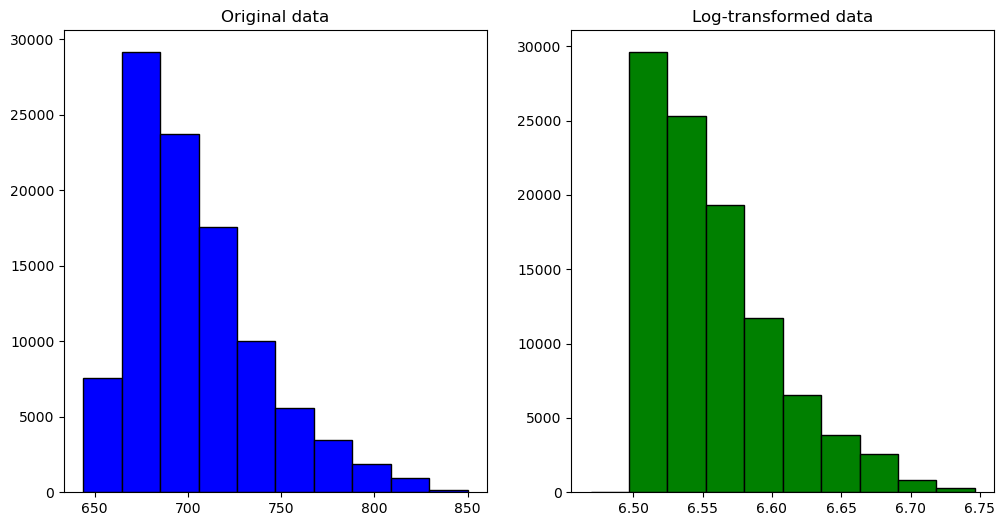

Skewness before log transform: 1.1021648009794056
Skewness after log transform: 0.9824850845097961


In [21]:
# Plotting original and log-transformed data
import matplotlib.pyplot as plt
from scipy.stats import skew


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['fico_range_high'], bins=10, color='blue', edgecolor='black')
plt.title('Original data')

plt.subplot(1, 2, 2)
plt.hist(df['fico_range_high_log'], bins=10, color='green', edgecolor='black')
plt.title('Log-transformed data')

plt.show()

print(f"Skewness before log transform: {skew(df['fico_range_high'])}")
print(f"Skewness after log transform: {skew(df['fico_range_high_log'])}")

Observation:
The fico_range_high feature was right-skewed (skewness = 1.10). After log transformation, skewness dropped to 0.95, showing improved symmetry but still some skew.

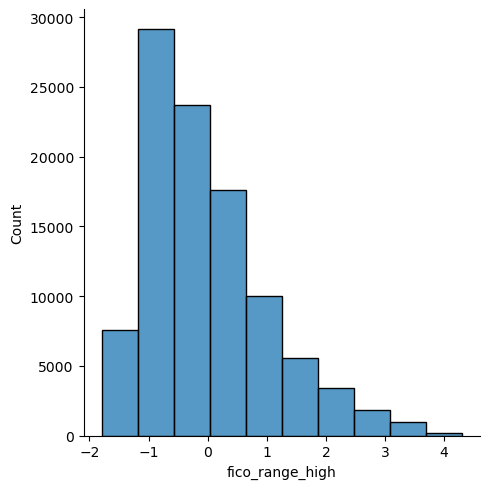

In [20]:
from scipy import stats
import numpy as np
import seaborn as sns

# Calculating on a single column, e.g. loan amount
z_scores = stats.zscore(df["fico_range_high"])
sns.displot(z_scores, bins = 10)

Short Observation:
Most Z-scores fall between -2 and 2, but there's a right tail, confirming mild positive skew and the presence of some high-value outliers.

__Defining threshold__

In [23]:
# Threshold = 3
for threshold in range(200, 301, 25):
    thresh = threshold/100
    print(f"Threshold == {thresh}, {df[np.abs(z_scores)>thresh].shape[0]} outliers ")

Threshold == 2.0, 5367 outliers 
Threshold == 2.25, 3654 outliers 
Threshold == 2.5, 2399 outliers 
Threshold == 2.75, 1899 outliers 
Threshold == 3.0, 1107 outliers 


Now I will calculate across all numeric features, no longer single feature:

In [24]:
# Calculate Z-scores for numerical columns
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))

# Define a threshold for identifying outliers
threshold = 3

# How many outliers identified for each numerical columns?
gt_thresh = z_scores > threshold
outlier_volume = pd.DataFrame(gt_thresh.sum(), columns=["num_outliers"])
outlier_volume.sort_values(by = "num_outliers"
                          , ascending= False)

C:\Users\esbiry01\AppData\Local\anaconda3\Lib\site-packages\numpy\core\_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


,num_outliers
mths_since_last_record,3590
out_prncp,2704
out_prncp_inv,2703
open_rv_12m,2596
inq_fi,2466
mths_since_rcnt_il,2457
open_acc_6m,2356
mths_since_recent_bc,2324
open_rv_24m,2317
inq_last_12m,2305


__Checking the outlying values for **fico_range_high** to compare to the rest of the distribution for that same column__

In [27]:
# Identifying the outliers for 'last_pymnt_amnt'
lp_outliers = df[np.abs(z_scores['fico_range_high']) > threshold]
print(f"Outlying values: {len(lp_outliers)}")
# Print distribution details for outliers in 'last_pymnt_amnt'
print("Distribution details for outliers:")
print(lp_outliers['fico_range_high'].describe())
# Print distribution details for non-outliers in 'last_pymnt_amnt'
non_lp_outliers = df[np.abs(z_scores['fico_range_high']) <= threshold]
print("Distribution details for non-outliers:")
print(non_lp_outliers['fico_range_high'].describe())

Outlying values: 1107
Distribution details for outliers:
count    1107.000000
mean      819.663053
std        10.297444
min       809.000000
25%       809.000000
50%       819.000000
75%       824.000000
max       850.000000
Name: fico_range_high, dtype: float64
Distribution details for non-outliers:
count    98893.000000
mean       703.351875
std         31.692607
min        644.000000
25%        679.000000
50%        699.000000
75%        719.000000
max        804.000000
Name: fico_range_high, dtype: float64


__Visualizing Outliers Visualizing outliers__

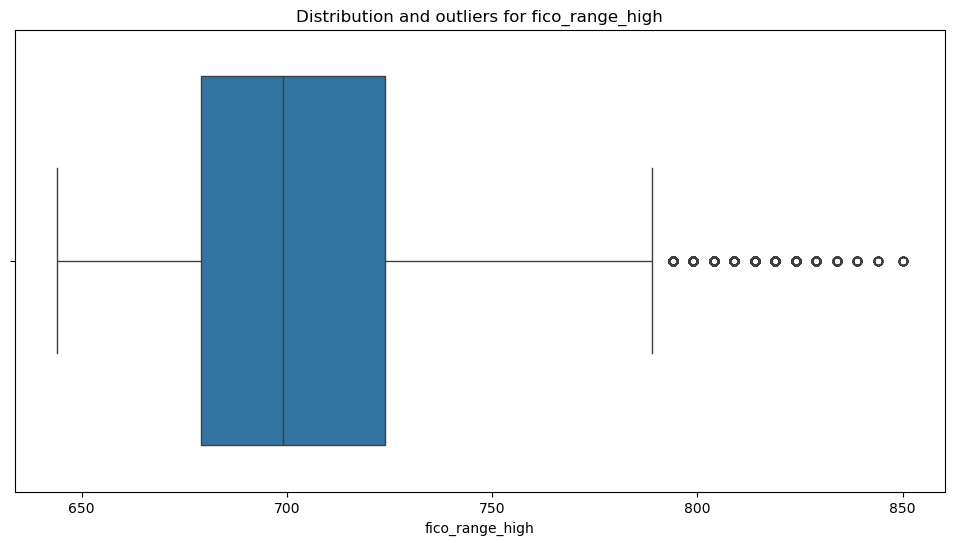

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

field_to_plot = "fico_range_high"

# Plotting variable distribution with outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=df[field_to_plot])
plt.title(f"Distribution and outliers for {field_to_plot}")
plt.show()


__Handling outliers__

In [43]:
# Capping outliers 

columns_to_cap = outlier_volume[outlier_volume['num_outliers'] > 0].index.tolist()


In [44]:
# Cap outliers in the original dataframe (df) at 90th percentile
for col in columns_to_cap:
    cap = df[col].quantile(0.90)
    original_max = df_original[col].max()
    
    # Apply capping
    df[col] = df[col].apply(lambda x: min(x, cap))
    
    capped_max = df[col].max()

    print(f"\n{col}")
    print(f"95th percentile cap: {cap}")
    print(f"Original max: {original_max}")
    print(f"After capping max: {capped_max}")

    if original_max == capped_max:
        print("⚠️ No change – max value not greater than cap (or not capped correctly)")
    else:
        print("✅ Capping applied")



annual_inc
95th percentile cap: 135000.0
Original max: 170000.0
After capping max: 135000.0
✅ Capping applied

dti
95th percentile cap: 31.17
Original max: 34.65049999999988
After capping max: 31.17
✅ Capping applied

fico_range_low
95th percentile cap: 750.0
Original max: 770.0
After capping max: 750.0
✅ Capping applied

fico_range_high
95th percentile cap: 754.0
Original max: 774.0
After capping max: 754.0
✅ Capping applied

mths_since_last_delinq
95th percentile cap: 55.0
Original max: 68.0
After capping max: 55.0
✅ Capping applied

mths_since_last_record
95th percentile cap: 63.0
Original max: 88.0
After capping max: 63.0
✅ Capping applied

pub_rec
95th percentile cap: 1.0
Original max: 1.0
After capping max: 1.0
⚠️ No change – max value not greater than cap (or not capped correctly)

revol_bal
95th percentile cap: 34180.0
Original max: 46431.449999999895
After capping max: 34180.0
✅ Capping applied

revol_util
95th percentile cap: 83.0
Original max: 90.0
After capping max: 83.0
✅

Outliers were capped. The change in max values was minimal, indicating that the majority of values were within reasonable bounds. Nonetheless, capping helps reduce the influence of edge cases and improves model robustness.

__Exportung df__

In [48]:
df.to_csv(r'C:\Users\esbiry01\OneDrive - ANDRITZ AG\106 Python\Capstone project\Data\2-intermediate\df_out_3.csv', index=False)